In [11]:
# !pip install sklearn
# !pip install seaborn
# !pip install plotly

# if pip install doesn;t solve error, try conda 
# !conda install --yes pandas
# !conda install --yes matplotlib

# please make sure to create COnda env and then do these isntallation
# conda create -n myenv python=3.7 

In [ ]:
# if you get error while installing fbprophet, follow this - 
# pip install -r https://raw.githubusercontent.com/facebook/prophet/master/python/requirements.txt
# pip install fbprophet==0.7.1

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
import datetime as dt
import calendar
import warnings
warnings.simplefilter('ignore')
import math
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
# plt.style.use('fivethirtyeight')
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from datetime import date, datetime, time, timedelta
from dateutil.relativedelta import relativedelta
import datetime as dt

import itertools
from fbprophet.diagnostics import performance_metrics

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [12]:
!pip install nsepy
from nsepy import get_history

  Using cached nsepy-0.8-py3-none-any.whl
  Using cached lxml-4.6.3-cp37-cp37m-macosx_10_9_x86_64.whl (4.5 MB)
     |████████████████████████████████| 61 kB 4.4 MB/s eta 0:00:011
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)
     |████████████████████████████████| 138 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 26.7 MB/s eta 0:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1


In [13]:
name = "HDFC" # Hosuing Finance Company
name = str(name)
print("You have choosen the company",name)

You have choosen the company HDFC


In [14]:
data = get_history(symbol=name, start=date(2018,3,1), end=date(2021,2,28)) # Extracting 3 years of the stock data
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-03-01,HDFC,EQ,1808.700,1811.000,1818.500,1801.000,1816.000,1814.150,1813.850,3272003,593493552330000.000,137372,2579712,0.788
2018-03-05,HDFC,EQ,1814.150,1814.000,1814.000,1780.300,1790.000,1789.600,1791.020,2163209,387434014805000.000,131858,1478427,0.683
2018-03-06,HDFC,EQ,1789.600,1803.900,1819.000,1758.100,1769.950,1782.800,1805.460,2899309,523458948395000.000,110964,2015059,0.695
2018-03-07,HDFC,EQ,1782.800,1774.350,1782.200,1756.100,1765.000,1761.750,1770.420,1624922,287679713340000.000,83682,968915,0.596
2018-03-08,HDFC,EQ,1761.750,1772.900,1803.550,1771.700,1795.000,1798.750,1789.270,3174098,567931711675000.000,105887,2155842,0.679


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

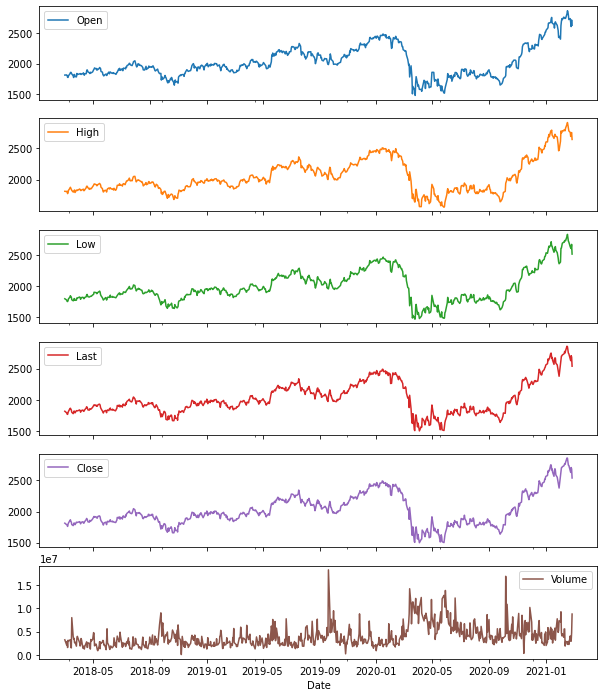

In [15]:
visual_data = data[[ 'Open', 'High', 'Low', 'Last',
       'Close','Volume']]
visual_data.plot(subplots=True, figsize=(10,12))

In [17]:
test_data = get_history(symbol=name, start=date(2021,3,1), end=date(2021,5,27)) # Extracting 3 years of the stock data
test_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-03-01,HDFC,EQ,2539.400,2556.000,2614.600,2548.600,2610.000,2606.000,2588.580,3595993,930853141095000.125,134145,2059491,0.573
2021-03-02,HDFC,EQ,2606.000,2615.000,2615.000,2541.400,2575.000,2564.000,2567.140,4086134,1048967951845000.125,162290,2300989,0.563
2021-03-03,HDFC,EQ,2564.000,2608.900,2664.150,2592.150,2654.850,2654.900,2626.730,5640063,1481493387745000.000,133676,3446930,0.611
2021-03-04,HDFC,EQ,2654.900,2610.000,2610.000,2568.000,2584.900,2582.950,2584.280,5315682,1373722018930000.000,235030,3086674,0.581
2021-03-05,HDFC,EQ,2582.950,2573.600,2579.900,2523.500,2546.900,2543.900,2551.400,4254126,1085397768885000.000,171484,2157972,0.507


# Calculating Profit

## Base Model

In [21]:
'''
initials_of_stock = Initials of the Stock as listed on NSE/BSE
starting_date = Date from which we want to train our data
ending_date = Date till which we want to stop trainign our data
forecasting_date = Date till which we want to forecast
value_on_prediction = On what value of stock do we want to Predict(Open,Close,High,Low). Generally it is done on 'Close' 
'''

def base_calulate_profit(initials_of_stock,starting_date,ending_date,forecasting_date,value_on_prediction):
    name = initials_of_stock # Hosuing Finance Company   #INSERT NAME & TIME
    name = str(name)
    print("You have choosen the company",name)
    print('Starting Date is ',starting_date)
    print('Ending Date is ',ending_date)
    print('Forecasting Date is ',forecasting_date)
    
    data = get_history(symbol=name, start=starting_date, end=ending_date) ##INSERT

    test_data = get_history(symbol=name, start=ending_date, end=forecasting_date) # For comparing later on

    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    value_on_prediction = str(value_on_prediction)
    data[value_on_prediction] = data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
    data2 = data[['Date',value_on_prediction]]
    data2.columns = ['ds','y']

    test_data = test_data.reset_index()
    test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')
    test_data[value_on_prediction] = test_data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
    test_data2 = test_data[['Date',value_on_prediction]]
    test_data2.columns = ['ds','y']

    rmse=[]
    num_days = (forecasting_date - ending_date).days
    num_days= int(num_days)
    print('Forecasting Period is for',num_days,' days')
    
    model = Prophet()
    model.fit(data2)  # Fit model with basic params

    df_cv = cross_validation(model, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmse.append(df_p['rmse'][0])

#     tuning_results = pd.DataFrame(all_params)
#     tuning_results['rmse'] = rmses
    print('RMSE= ',rmse)

    #Prediction of Future Data
    future = model.make_future_dataframe(periods=num_days)
    future.tail()

    #using forecasting object
    forecast = model.predict(future)
    forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecasting_values = forecast.tail(num_days)
    
    forecast.tail(num_days).plot(figsize=(15,5),x = 'ds',y='yhat')
    plt.title(('Stock Prediction of '+name))
    plt.xlabel('Date')
    plt.ylabel('Stock Price')


    opening_value_of_stock = data2['y'].tail(1)
    opening_value_of_stock = float(opening_value_of_stock)   # Last value of stock on last day of train 
    closing_predicted_value_of_stock = forecasting_values['yhat'].tail(1)
    closing_predicted_value_of_stock = float(closing_predicted_value_of_stock)  # predicted value  
    actual_predicted_value_of_stock = test_data2['y'].tail(1)
    actual_predicted_value_of_stock = float(actual_predicted_value_of_stock)  # Actual Value of stock

    print(opening_value_of_stock)
    print(closing_predicted_value_of_stock)
    print(actual_predicted_value_of_stock)  
    
    profit_predicted_actual = round((actual_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)
    print('Actual Profit of this stock is ',profit_predicted_actual,"%")
    
    
    profit_predicted_forecast = round((closing_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)
    print('Predicted Profit of this stock is ',profit_predicted_forecast,"%")




You have choosen the company ITC
Starting Date is  2018-09-30
Ending Date is  2021-01-01
Forecasting Date is  2021-05-28


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 147  days


INFO:fbprophet:Making 29 forecasts with cutoffs between 2019-10-09 00:00:00 and 2020-12-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f95744a0d90>


RMSE=  [26.964836071262418]
213.85
269.34227207768544
212.9
Actual Profit of this stock is  -0.44 %
Predicted Profit of this stock is  25.95 %


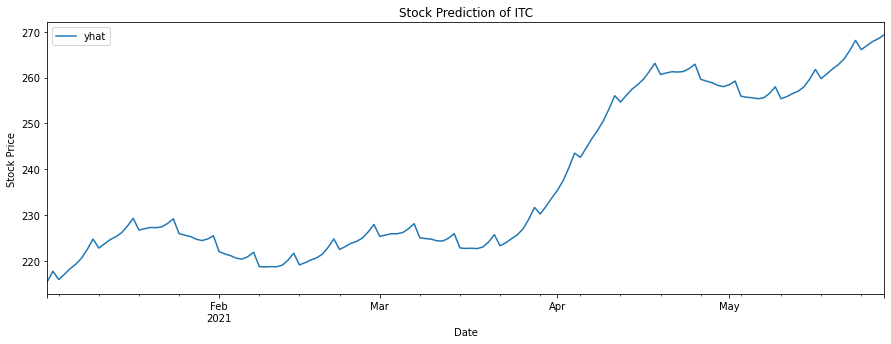

In [78]:
base_calulate_profit('ITC',date(2018,9,30),date(2021,1,1),date(2021,5,28),'Close')

You have choosen the company HDFC
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f95503f9c50>


RMSE=  [244.2526220385137]
2377.8
2432.313072934725
2420.1
Actual Profit of this stock is  1.78 %
Predicted Profit of this stock is  2.29 %


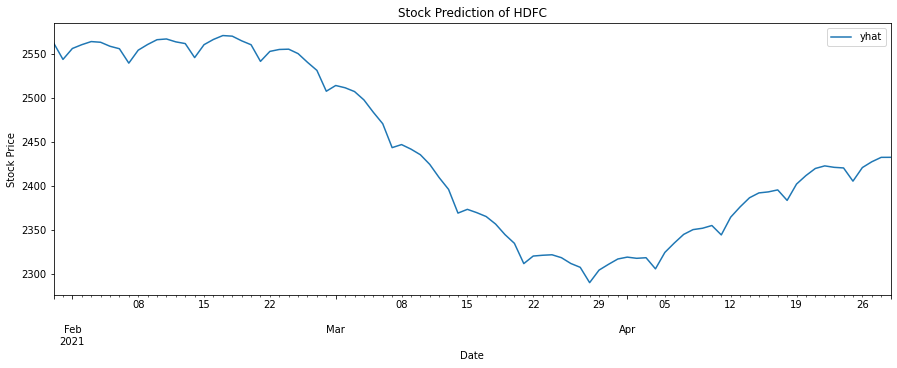

In [77]:
base_calulate_profit('HDFC',date(2018,9,30),date(2021,1,30),date(2021,4,30),'Close')

### Defining the parameters in FB Prophet-
###### 1) growth - It states the growth of our trend . By default it is considered as linear , however if required it can also be changed to logistic. Here it shows if our stock has an upward trend or downward trend over the years
###### 2) make_future_dataframe - It is a function used to predict or forecast the future output . The period for forecasting has to be speficied in number of days. Here we shall use this to predict the prices of our stock
###### 3) changepoint_prior_scale - If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible. Stock prices are drastically affected due to this is sensitivity to change
###### 4) seasonality_prior_scale -  A parameter which adjusts the extent to which the seasonality models will fit the data. Again, stock prices are affected here as we are trying to control the change in seasonalities.
###### 5) daily,weekly,monthly,yearly seasonalities -  Parameters which adjusts the extent to which the daily,weekly,monthly,yearly changes will fit the stock's prices.
###### 6) fourier order - Seasonalities are estimated using a partial Fourier sum.The number of terms in the partial sum ( or the order) is a parameter that determines how quickly the seasonality can change.

In [30]:
## Hyperparameter Tuning using random numbers
import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import performance_metrics

data = get_history(symbol=name, start=date(2018,3,1), end=date(2021,5,28)) # Extracting 3 years of the stock data
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Close'] = data['Close'].apply(lambda x: float(x))
data2 = data[['Date','Close']]
data2.columns = ['ds','y']

param_grid = {  
    'changepoint_prior_scale': [0.05,0.08,0.09,0.1],
    'seasonality_prior_scale': [1.6,1.7,1.8]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params)
    model.fit(data2)  # Fit model with basic params
    
    df_cv = cross_validation(model, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 53 forecasts with cutoffs between 2019-03-10 00:00:00 and 2021-04-28 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9562244dd0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 53 forecasts with cutoffs between 2019-03-10 00:00:00 and 2021-04-28 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f955085bc90>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 53 forecasts with cutoffs between 2019-03-10 00:00:00 and 2021-04-28 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9561751d50>
INFO:fbprophet:Disabling daily seasonality. Run p

    changepoint_prior_scale  seasonality_prior_scale    rmse
0                     0.050                    1.600 190.650
1                     0.050                    1.700 189.779
2                     0.050                    1.800 190.791
3                     0.080                    1.600 180.834
4                     0.080                    1.700 180.364
5                     0.080                    1.800 179.023
6                     0.090                    1.600 176.498
7                     0.090                    1.700 178.226
8                     0.090                    1.800 177.431
9                     0.100                    1.600 176.040
10                    0.100                    1.700 175.666
11                    0.100                    1.800 176.607


In [31]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.7}


In [32]:
##Model fitting - 1 
## In this model we will try to use almost all the important parameters . However we may have to remove a few for a better model
model = Prophet(growth='linear',changepoint_prior_scale=best_params['changepoint_prior_scale'],seasonality_prior_scale=best_params['seasonality_prior_scale'],daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)
model.add_seasonality(name='custom_monthly', period=30, fourier_order=10)
model.add_country_holidays(country_name='India')
model.add_seasonality(name = 'daily',period = 1, fourier_order = 10)
model.add_seasonality(name = 'weekly',period = 7, fourier_order = 50)
model.add_seasonality(name = 'yearly',period = 365, fourier_order = 10)

model.fit(data2)

INFO:fbprophet:Making 41 forecasts with cutoffs between 2019-09-06 00:00:00 and 2021-04-28 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

173.6428759842554


<AxesSubplot:xlabel='ds'>

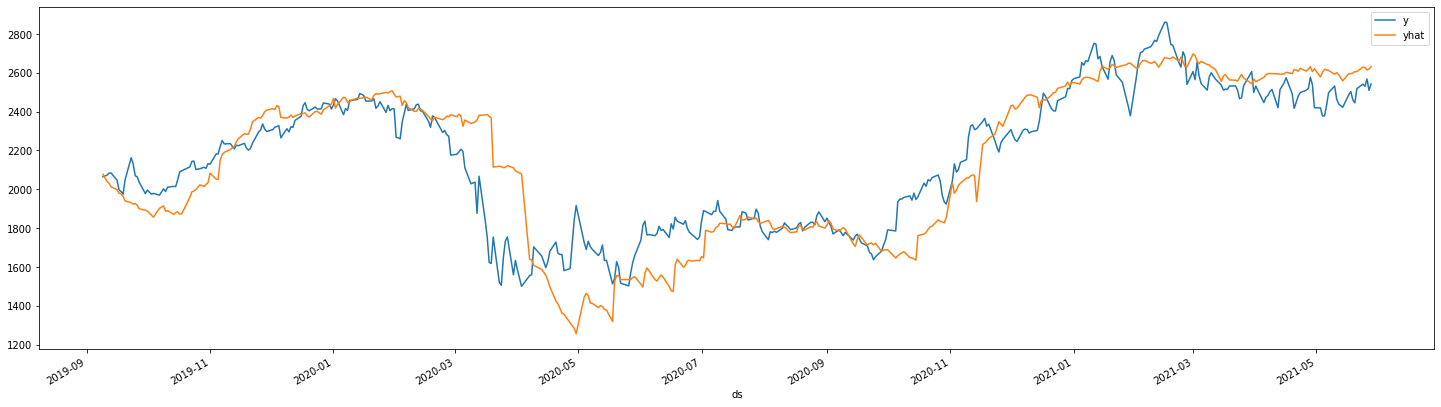

In [33]:
# Applying Cross Validation - 1
cv_stock = cross_validation(model,initial='548 days',period='15 days',horizon="30 days")  
cv2_stock = cv_stock.groupby(['ds'])['yhat'].mean().reset_index()
cv3_stock = cv_stock.groupby(['ds'])['y'].mean().reset_index()
cv4_stock = pd.merge(cv3_stock, cv2_stock, how='inner', on='ds')
rms = sqrt(mean_squared_error(cv4_stock['y'],cv4_stock['yhat']))
print(rms)

pd.concat([cv4_stock.set_index('ds')['y'],cv4_stock.set_index('ds')['yhat']],axis=1).plot(figsize = (25,7))


In [35]:
## Now our model looks better so we can forecast it
#Predicting future periods as days
num_days = int(31)
future = model.make_future_dataframe(periods=num_days)
future.tail()

#using forecasting object
forecast = model.predict(future)
forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail(num_days)

,ds,yhat,yhat_lower,yhat_upper
801,2021-05-29,2513.025,2428.291,2588.494
802,2021-05-30,2484.372,2402.599,2563.381
803,2021-05-31,2536.221,2456.723,2608.785
804,2021-06-01,2525.180,2447.787,2605.372
805,2021-06-02,2528.278,2451.638,2605.906
806,2021-06-03,2547.730,2469.943,2625.894
807,2021-06-04,2564.399,2486.469,2645.915
808,2021-06-05,2558.889,2486.795,2632.286
809,2021-06-06,2518.932,2432.987,2597.987
810,2021-06-07,2574.400,2495.517,2656.056


Text(0, 0.5, 'Stock Price')

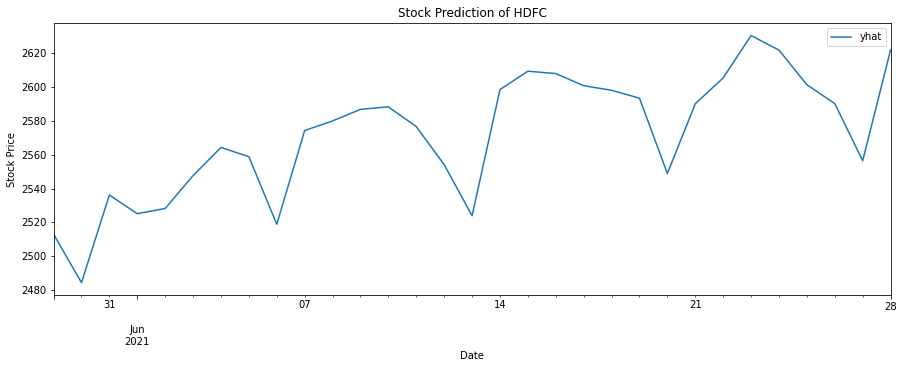

In [36]:
forecast.tail(num_days).plot(figsize=(15,5),x = 'ds',y='yhat')
plt.title(('Stock Prediction of '+name))
plt.xlabel('Date')
plt.ylabel('Stock Price')


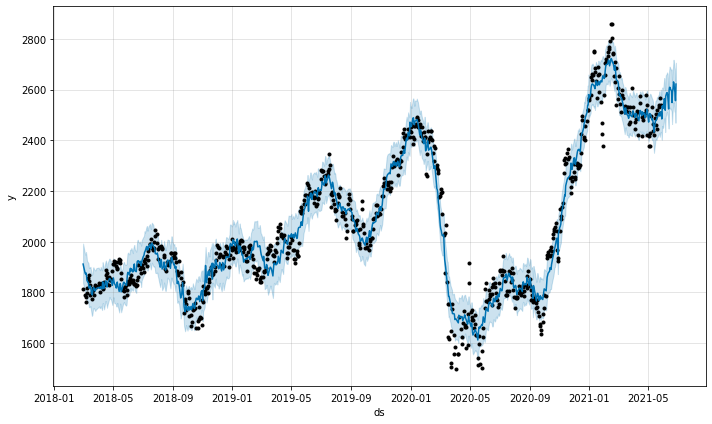

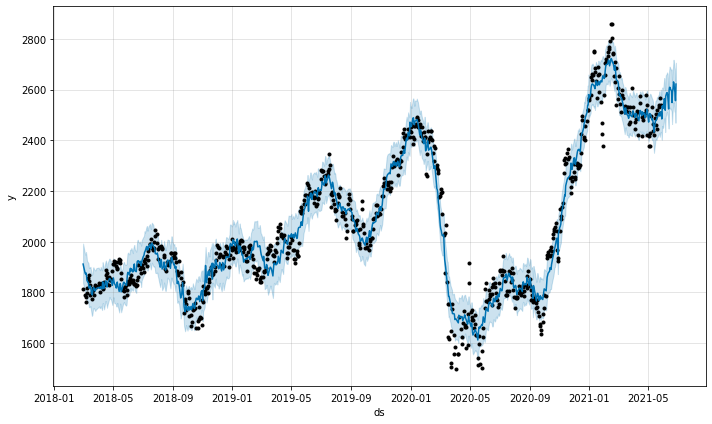

In [37]:
model.plot(forecast)
# Black Dots --> Data used to train the model 
# Blue Line --> Line fitting through Data or Predictions based on learning 
# Blue Haze --> uncertainty intervals of predictions; lower the better 

In [38]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds")
    )

In [42]:
cmp_df = make_comparison_dataframe(data2, forecast)
cmp_df.tail(n=10)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2021-06-19,2593.550,2513.503,2679.995,NaN
2021-06-20,2548.988,2464.096,2631.864,NaN
2021-06-21,2590.264,2506.984,2672.964,NaN
2021-06-22,2605.549,2531.858,2688.966,NaN
2021-06-23,2630.615,2549.898,2718.056,NaN
2021-06-24,2621.995,2543.672,2708.959,NaN
2021-06-25,2601.504,2514.806,2689.084,NaN
2021-06-26,2590.366,2510.982,2675.720,NaN
2021-06-27,2556.553,2469.439,2634.657,NaN


In [47]:
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly
init_notebook_mode(connected=True)

In [48]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""

    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode="lines")
        args.update(kwargs)
        return go.Scatter(**args)

    lower_bound = create_go(
        "Lower Bound",
        "yhat_lower",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
    )
    upper_bound = create_go(
        "Upper Bound",
        "yhat_upper",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
        fillcolor="rgba(68, 68, 68, 0.3)",
        fill="tonexty",
    )
    forecast = create_go(
        "Forecast", "yhat", num_predictions, line=dict(color="rgb(31, 119, 180)")
    )
    actual = create_go("Actual", "y", num_values, marker=dict(color="red"))

    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title="Price"), title=title, showlegend=False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)


show_forecast(cmp_df, prediction_size, 100, "Stock Prediction for HDFC")

In [62]:
'''
initials_of_stock = Initials of the Stock as listed on NSE/BSE
starting_date = Date from which we want to train our data
ending_date = Date till which we want to stop trainign our data
forecasting_date = Date till which we want to forecast
value_on_prediction = On what value of stock do we want to Predict(Open,Close,High,Low). Generally it is done on 'Close' 
'''

def base_calulate_profit_multi_stock(stock_list,starting_date,ending_date,forecasting_date,value_on_prediction):
    final_stock_prediction = {}
    for eachStock in stock_list:
        name = eachStock # Hosuing Finance Company   #INSERT NAME & TIME
        name = str(name)
        print("You have choosen the company",name)
        print('Starting Date is ',starting_date)
        print('Ending Date is ',ending_date)
        print('Forecasting Date is ',forecasting_date)

        data = get_history(symbol=name, start=starting_date, end=ending_date) ##INSERT

        test_data = get_history(symbol=name, start=ending_date, end=forecasting_date) # For comparing later on

        data = data.reset_index()
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

        value_on_prediction = str(value_on_prediction)
        data[value_on_prediction] = data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
        data2 = data[['Date',value_on_prediction]]
        data2.columns = ['ds','y']

        test_data = test_data.reset_index()
        test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')
        test_data[value_on_prediction] = test_data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
        test_data2 = test_data[['Date',value_on_prediction]]
        test_data2.columns = ['ds','y']

        rmse=[]
        num_days = (forecasting_date - ending_date).days
        num_days= int(num_days)
        print('Forecasting Period is for',num_days,' days')

        model = Prophet()
        model.fit(data2)  # Fit model with basic params

        df_cv = cross_validation(model, horizon='30 days', parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmse.append(df_p['rmse'][0])

    #     tuning_results = pd.DataFrame(all_params)
    #     tuning_results['rmse'] = rmses
        print('RMSE= ',rmse)

        #Prediction of Future Data
        future = model.make_future_dataframe(periods=num_days)
        future.tail()

        #using forecasting object
        forecast = model.predict(future)
        forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        forecasting_values = forecast.tail(num_days)

#         forecast.tail(num_days).plot(figsize=(15,5),x = 'ds',y='yhat')
#         plt.title(('Stock Prediction of '+name))
#         plt.xlabel('Date')
#         plt.ylabel('Stock Price')


        opening_value_of_stock = data2['y'].tail(1)
        opening_value_of_stock = float(opening_value_of_stock)   # Last value of stock on last day of train 
        closing_predicted_value_of_stock = forecasting_values['yhat'].tail(1)
        closing_predicted_value_of_stock = float(closing_predicted_value_of_stock)  # predicted value  
        actual_predicted_value_of_stock = test_data2['y'].tail(1)
        actual_predicted_value_of_stock = float(actual_predicted_value_of_stock)  # Actual Value of stock

#         print(opening_value_of_stock)
#         print(closing_predicted_value_of_stock)
#         print(actual_predicted_value_of_stock)  

        profit_predicted_actual = round((actual_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)
#         print('Actual Profit of this stock is ',profit_predicted_actual,"%")


        profit_predicted_forecast = round((closing_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)
#         print('Predicted Profit of this stock is ',profit_predicted_forecast,"%")

        final_stock_prediction[eachStock] = [rmse, profit_predicted_actual,profit_predicted_forecast]
    
    return final_stock_prediction




In [63]:
#starting_date,ending_date,forecasting_date
stocks = ['HDFC','TCS','RELIANCE','HDFCBANK','KOTAKBANK','ITC']

#train_data = starting_date,ending_date
#test_data = ending_date,forecasting_date

results = base_calulate_profit_multi_stock(stocks,date(2018,9,30),date(2021,1,30),date(2021,4,30),'Close')

You have choosen the company HDFC
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9573ae85d0>


RMSE=  [241.7997422933676]
You have choosen the company TCS
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9572d25f10>


RMSE=  [260.951261398452]
You have choosen the company RELIANCE
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f95740c1fd0>


RMSE=  [256.1591311447381]
You have choosen the company HDFCBANK
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9563243550>


RMSE=  [284.3505760464975]
You have choosen the company KOTAKBANK
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9550973690>


RMSE=  [177.01302523501099]
You have choosen the company ITC
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9562151290>


RMSE=  [26.58394648854267]


In [64]:
result_df = pd.DataFrame.from_dict(results).T

In [65]:
result_df.columns = ["RMSE", "Actual_Profit","Predicted_Profit"]

In [66]:
result_df

,RMSE,Actual_Profit,Predicted_Profit
HDFC,[241.7997422933676],1.780,5.570
TCS,[260.951261398452],-2.430,18.010
RELIANCE,[256.1591311447381],8.280,3.450
HDFCBANK,[284.3505760464975],1.570,40.590
KOTAKBANK,[177.01302523501099],2.090,16.580
ITC,[26.58394648854267],-0.320,10.430


In [68]:
'''
initials_of_stock = Initials of the Stock as listed on NSE/BSE
starting_date = Date from which we want to train our data
ending_date = Date till which we want to stop trainign our data
forecasting_date = Date till which we want to forecast
value_on_prediction = On what value of stock do we want to Predict(Open,Close,High,Low). Generally it is done on 'Close' 
'''

def base_calulate_profit_multi_stock_tuned(stock_list,starting_date,ending_date,forecasting_date,value_on_prediction):
    final_stock_prediction = {}
    for eachStock in stock_list:
        name = eachStock # Hosuing Finance Company   #INSERT NAME & TIME
        name = str(name)
        print("You have choosen the company",name)
        print('Starting Date is ',starting_date)
        print('Ending Date is ',ending_date)
        print('Forecasting Date is ',forecasting_date)

        data = get_history(symbol=name, start=starting_date, end=ending_date) ##INSERT

        test_data = get_history(symbol=name, start=ending_date, end=forecasting_date) # For comparing later on

        data = data.reset_index()
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

        value_on_prediction = str(value_on_prediction)
        data[value_on_prediction] = data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
        data2 = data[['Date',value_on_prediction]]
        data2.columns = ['ds','y']

        test_data = test_data.reset_index()
        test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')
        test_data[value_on_prediction] = test_data[value_on_prediction].apply(lambda x: float(x)) # INSERT Whether opening or closing
        test_data2 = test_data[['Date',value_on_prediction]]
        test_data2.columns = ['ds','y']

        rmse=[]
        num_days = (forecasting_date - ending_date).days
        num_days= int(num_days)
        print('Forecasting Period is for',num_days,' days')
        
        param_grid = {  
            'changepoint_prior_scale': [0.05,0.08,0.09],
            'seasonality_prior_scale': [1.6,1.7]
        }

        # Generate all combinations of parameters
        all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
        rmses = []  # Store the RMSEs for each params here

        # Use cross validation to evaluate all parameters
        for params in all_params:
            model = Prophet(**params)
            model.fit(data2)  # Fit model with basic params

            df_cv = cross_validation(model, horizon='30 days', parallel="processes")
            df_p = performance_metrics(df_cv, rolling_window=1)
            rmses.append(df_p['rmse'].values[0])

        # Find the best parameters
        tuning_results = pd.DataFrame(all_params)
        tuning_results['rmse'] = rmses
        
        ##Model fitting - 1 
        ## In this model we will try to use almost all the important parameters . However we may have to remove a few for a better model
        model = Prophet(growth='linear',changepoint_prior_scale=best_params['changepoint_prior_scale'],seasonality_prior_scale=best_params['seasonality_prior_scale'],daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)
        model.add_seasonality(name='custom_monthly', period=30, fourier_order=10)
        model.add_country_holidays(country_name='India')
        model.add_seasonality(name = 'daily',period = 1, fourier_order = 10)
        model.add_seasonality(name = 'weekly',period = 7, fourier_order = 50)
        model.add_seasonality(name = 'yearly',period = 365, fourier_order = 10)

        model.fit(data2)

        # Applying Cross Validation - 1
        cv_stock = cross_validation(model,initial='548 days',period='15 days',horizon="30 days")  
        cv2_stock = cv_stock.groupby(['ds'])['yhat'].mean().reset_index()
        cv3_stock = cv_stock.groupby(['ds'])['y'].mean().reset_index()
        cv4_stock = pd.merge(cv3_stock, cv2_stock, how='inner', on='ds')
        rms = sqrt(mean_squared_error(cv4_stock['y'],cv4_stock['yhat']))
        print(rms)

        pd.concat([cv4_stock.set_index('ds')['y'],cv4_stock.set_index('ds')['yhat']],axis=1).plot(figsize = (25,7))
            
        future = model.make_future_dataframe(periods=num_days)
        future.tail()

        #using forecasting object
        forecast = model.predict(future)
        forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        forecasting_values = forecast.tail(num_days)

        opening_value_of_stock = data2['y'].tail(1)
        opening_value_of_stock = float(opening_value_of_stock)   # Last value of stock on last day of train 
        closing_predicted_value_of_stock = forecasting_values['yhat'].tail(1)
        closing_predicted_value_of_stock = float(closing_predicted_value_of_stock)  # predicted value  
        actual_predicted_value_of_stock = test_data2['y'].tail(1)
        actual_predicted_value_of_stock = float(actual_predicted_value_of_stock)  # Actual Value of stock

        profit_predicted_actual = round((actual_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)

        profit_predicted_forecast = round((closing_predicted_value_of_stock-opening_value_of_stock)*100/opening_value_of_stock,2)

        final_stock_prediction[eachStock] = [rmse, profit_predicted_actual,profit_predicted_forecast]
    
    return final_stock_prediction





You have choosen the company HDFC
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9573e70ed0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f95632c1d10>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9563108a90>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs b

  0%|          | 0/19 [00:00<?, ?it/s]

161.4114118013182
You have choosen the company TCS
Starting Date is  2018-09-30
Ending Date is  2021-01-30
Forecasting Date is  2021-04-30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting Period is for 90  days


INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9563108c10>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f956302d410>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs between 2019-10-07 00:00:00 and 2020-12-30 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f9574460fd0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 31 forecasts with cutoffs b

  0%|          | 0/19 [00:00<?, ?it/s]

207.3031673044241


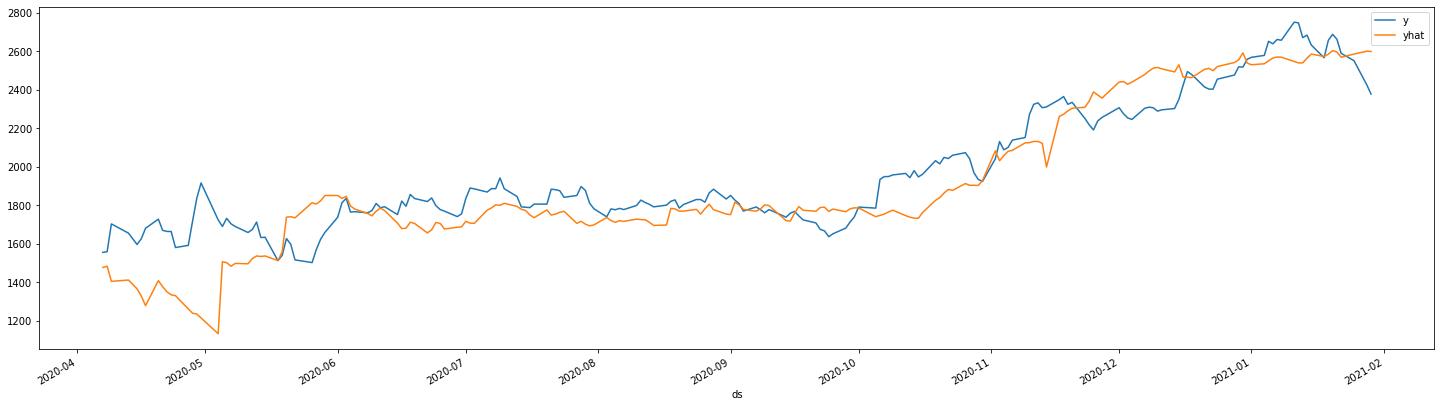

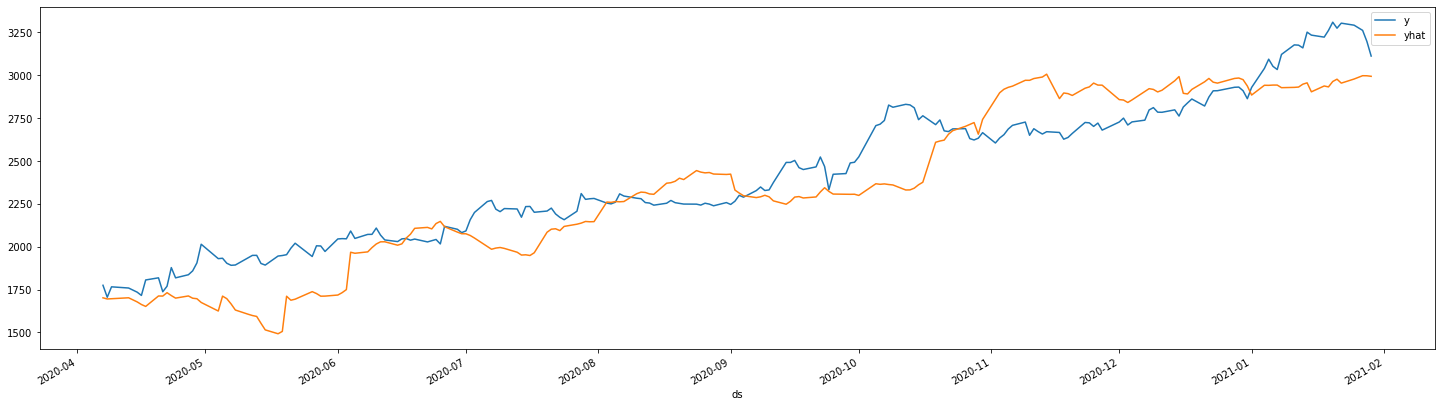

In [69]:
#starting_date,ending_date,forecasting_date
stocks = ['HDFC','TCS']

#train_data = starting_date,ending_date
#test_data = ending_date,forecasting_date

results = base_calulate_profit_multi_stock_tuned(stocks,date(2018,9,30),date(2021,1,30),date(2021,4,30),'Close')

In [70]:
result_df = pd.DataFrame.from_dict(results).T

In [71]:
result_df.columns = ["RMSE", "Actual_Profit","Predicted_Profit"]

In [72]:
result_df

,RMSE,Actual_Profit,Predicted_Profit
HDFC,[],1.780,2.130
TCS,[],-2.430,17.140
